<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [17]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    result = sum([np.dot(X[i], V[i]) for i in range(len(X))])
    return result

#Проверим
print(sum_prod([[[1, 1], [1, 1]], [[1, 2], [2, 1]]], [[1, 1], [1, 2]]))

[7 6]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [16]:
def binarize(M, threshold=0.5):
    M = np.array(M)
    return np.where(M>threshold, 1, 0)

#Проверим
print(binarize([[10, 8], [1, 2]], 5))

[[1 1]
 [0 0]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [19]:
def unique_rows(mat):
    unique_elements = [np.unique(row) for row in mat]
    return unique_elements

def unique_columns(mat):
    unique_elements = [np.unique(column) for column in mat.T]
    return unique_elements

#Проверим
print(unique_rows(np.array([[1, 2, 3, 4], [2, 3, 4, 4], [5, 6, 7, 5]])))
print(unique_columns(np.array([[1, 2, 3, 4], [2, 3, 4, 4], [5, 6, 7, 5]])))

[array([1, 2, 3, 4]), array([2, 3, 4]), array([5, 6, 7])]
[array([1, 2, 5]), array([2, 3, 6]), array([3, 4, 7]), array([4, 5])]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

C:\Users\dedsec\AppData\Local\Temp\ipykernel_13868\1370217910.py:20: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


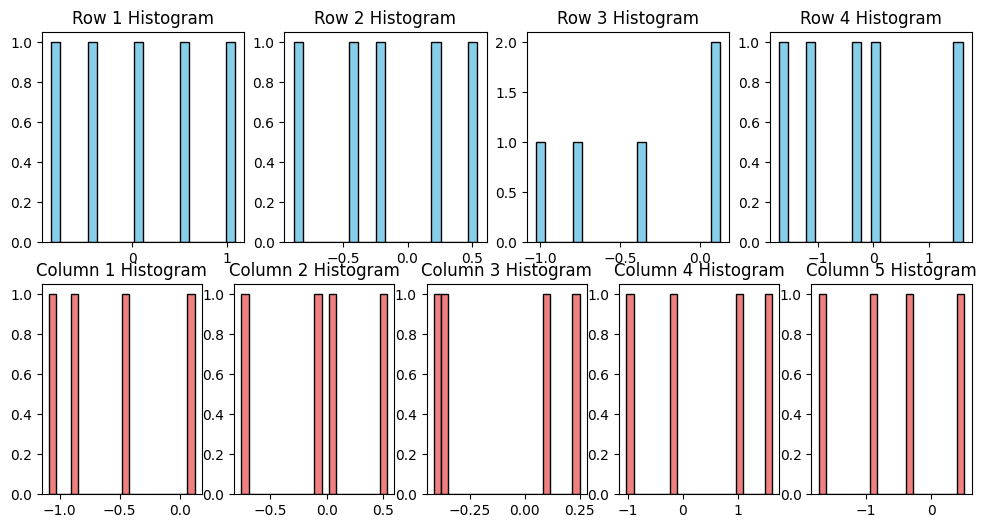

(array([ 0.07370314, -0.14568781, -0.38340679, -0.31994902]),
 array([-0.56348207, -0.05241522, -0.10476257,  0.3667476 , -0.61526334]),
 array([0.46386258, 0.25045472, 0.21087107, 1.26969382]),
 array([0.21541663, 0.21541393, 0.08335848, 1.08346042, 0.64669744]))

In [31]:
def analyze_matrix(m, n):
    matrix = np.random.normal(size=(m, n))
    
    row_means = np.mean(matrix, axis=1)
    column_means = np.mean(matrix, axis=0)
    row_variances = np.var(matrix, axis=1)
    column_variances = np.var(matrix, axis=0)

    plt.figure(figsize=(12, 6))
    for i in range(m):
        plt.subplot(2, m, i + 1)
        plt.hist(matrix[i, :], bins=20, color="skyblue", edgecolor="black")
        plt.title(f'Row {i+1} Histogram')
    
    for j in range(n):
        plt.subplot(2, n, n + j + 1)
        plt.hist(matrix[:, j], bins=20, color="lightcoral", edgecolor="black")
        plt.title(f'Column {j+1} Histogram')
    
    plt.tight_layout()
    plt.show()
    
    return row_means, column_means, row_variances, column_variances

#Проверим
analyze_matrix(4, 5)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [21]:
def chess(m, n, a, b):
    matrix = np.full((m, n), a)  
    matrix[::2, ::2] = b  
    matrix[1::2, 1::2] = b  
    
    return matrix
    
#Проверим
print(chess(4, 4, 0, 1))

[[1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

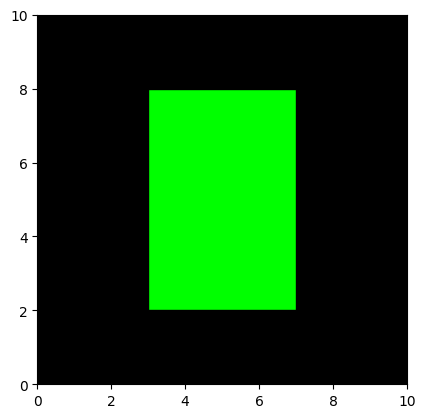

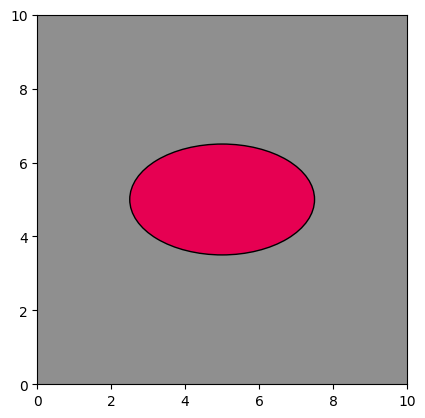

In [30]:
import matplotlib.patches as patches

def draw_rectangle(m, n, a, b, bg_color, rect_color):
    fig, ax = plt.subplots()
    ax.set_xlim([0, m])
    ax.set_ylim([0, n])
    ax.set_facecolor(bg_color)
    rectangle = patches.Rectangle((m/2 - a/2, n/2 - b/2), a, b, linewidth=1, edgecolor='black', facecolor=rect_color)
    ax.add_patch(rectangle)
    plt.gca().set_aspect("equal", adjustable="box")
    plt.show()

def draw_ellipse(m, n, a, b, bg_color, ellipse_color):
    fig, ax = plt.subplots()
    ax.set_xlim([0, m])
    ax.set_ylim([0, n])
    ax.set_facecolor(bg_color)
    ellipse = patches.Ellipse((m/2, n/2), a, b, linewidth=1, edgecolor='black', facecolor=ellipse_color)
    ax.add_patch(ellipse)
    plt.gca().set_aspect("equal", adjustable="box")
    plt.show()

#Проверим black and green
draw_rectangle(10, 10, 4, 6, (0, 0, 0), (0, 1, 0))

#Проверим gray and red
draw_ellipse(10, 10, 5, 3, (0.56, 0.56, 0.56), (0.90, 0, 0.32))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

Математическое ожидание: 5.0
Дисперсия: 6.0
СКО: 2.449489742783178
Локальные максимумы: [3 8]
Локальные минимумы: [0 6 9]


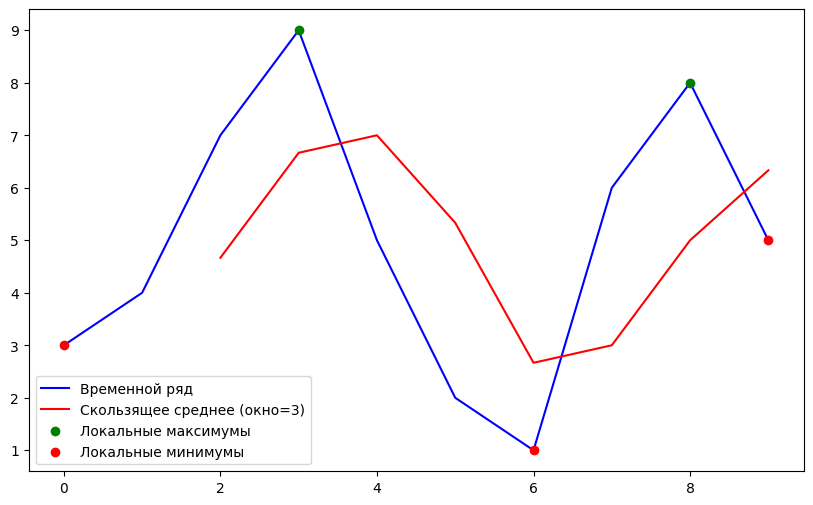

In [29]:
def AnalyseTimeSerie(time_series, window_size):
    mean = np.mean(time_series)

    variance = np.var(time_series)

    std_deviation = np.std(time_series)

    local_max = np.where(np.r_[True, time_series[1:] > time_series[:-1]] & np.r_[time_series[:-1] > time_series[1:], True])[0]
    local_min = np.where(np.r_[True, time_series[1:] < time_series[:-1]] & np.r_[time_series[:-1] < time_series[1:], True])[0]


    weights = np.ones(window_size)
    moving_avg = np.convolve(time_series, weights, mode="valid") / window_size

    print("Математическое ожидание:", mean)
    print("Дисперсия:", variance)
    print("СКО:", std_deviation)
    print("Локальные максимумы:", local_max)
    print("Локальные минимумы:", local_min)

    plt.figure(figsize=(10, 6))
    plt.plot(time_series, label='Временной ряд', color="b")
    plt.plot(np.arange(window_size-1, len(time_series)), moving_avg, label=f"Скользящее среднее (окно={window_size})", color="r")
    plt.scatter(local_max, time_series[local_max], color="g", label="Локальные максимумы", zorder=5)
    plt.scatter(local_min, time_series[local_min], color="r", label="Локальные минимумы", zorder=5)
    plt.legend()
    plt.show()

#Проверим
AnalyseTimeSerie(np.array([3, 4, 7, 9, 5, 2, 1, 6, 8, 5]), 3)

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [28]:
def one_hot_encoding(vector):
    num_classes = np.max(vector) + 1
    one_hot_encoded = np.zeros((len(vector), num_classes))
    
    for i, value in enumerate(vector):
        one_hot_encoded[i, value] = 1
    
    return one_hot_encoded

#Проверим
print(one_hot_encoding([0, 2, 3, 0]))

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
